# CIFAR Classifier Module Demo
*Welcome to the demo of our lib CIFAR Classifier !*

A quick summary of what will be showed in this notebook :


1. Imports
2. Data loading and train/test/val separation
3. SIFT features
4. Features extraction
5. Models selection
6. CrossValidation
7. GridSearch
8. Show some results

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from CIFAR_Classif.data_preprocess import load_data, unpickle
from CIFAR_Classif.generic_classifier import GenericClassifier
from CIFAR_Classif.generic_features_extractor import GenericFeaturesExtractor
from CIFAR_Classif.metrics import benchmark_models, benchmark_feature_extractors, plot_class_distribution
from CIFAR_Classif.bovw import get_SIFT_kp_and_desc, get_bovw_features, reduce_descs_dimensions
from sklearn.model_selection import train_test_split, cross_val_score
import cv2
from sklearn.cluster import KMeans


### Data loading and train/test/val separation

In [2]:
path_list = ['../data/cifar-10-batches-py/data_batch_5', '../data/cifar-10-batches-py/data_batch_4', '../data/cifar-10-batches-py/data_batch_3',
             '../data/cifar-10-batches-py/data_batch_2', '../data/cifar-10-batches-py/data_batch_1']

meta_path = '../data/cifar-10-batches-py/batches.meta'

labels_meaning = unpickle(meta_path)[b'label_names'] # List of the labels
labels_meaning = [label.decode('utf-8') for label in labels_meaning] # We turn the binary strings into normal strings


# Load the data
X, y = load_data(path_list, apply_preprocess=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42) # 15% of the data for testing
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42) # 30% of 85% of the data for validation

First of all, let's take a look at our class distribution.

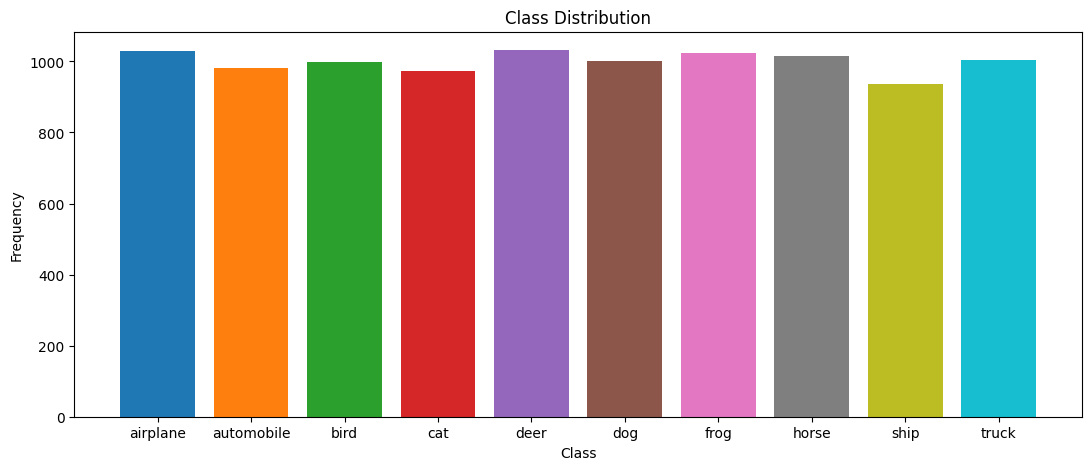

In [3]:
plot_class_distribution(y, labels=labels_meaning)

### SIFT Features

Here we illustrate our SIFT features on a picture

In [18]:
train_keypoints, train_descriptors = get_SIFT_kp_and_desc(X_train, dim_out=64)
test_keypoints, test_descriptors = get_SIFT_kp_and_desc(X_test, dim_out=64)

/home/spottedbush/.virtualenvs/cifar_classif/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/spottedbush/.virtualenvs/cifar_classif/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


/home/spottedbush/.virtualenvs/cifar_classif/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/spottedbush/.virtualenvs/cifar_classif/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


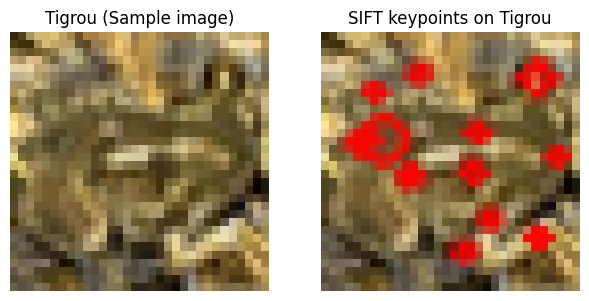

In [11]:
img = X_train[0]
plt.subplot(1, 3, 1)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title('Tigrou (Sample image)')
plt.axis('off')

sift_kp_img = cv2.drawKeypoints(img, train_keypoints[0], 0, (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(1, 3, 2)
plt.imshow(sift_kp_img, cmap='gray')
plt.title('SIFT keypoints on Tigrou')
plt.axis('off')

plt.subplots_adjust(right=1.5)
plt.show()

## Features extraction

We choose to use the following feature extractors:
- Histogram of Gradient (HoG)
- Local Binary Pattern (LBP)
- SIFT
- Flatten vectors

In [6]:
benchmark_feature_extractors(X_train, y_train, X_test, y_test, ["hog", "flat"], compare_models=True, verbose=False)



------Feature extractor tested: hog------


/home/spottedbush/.virtualenvs/cifar_classif/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


	Accuracy for svc: 0.582
	Accuracy for logistic_regression: 0.5166666666666667
	Accuracy for knn: 0.42733333333333334


------Feature extractor tested: flat------


/home/spottedbush/.virtualenvs/cifar_classif/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/spottedbush/.virtualenvs/cifar_classif/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


	Accuracy for svc: 0.48
	Accuracy for logistic_regression: 0.288
	Accuracy for knn: 0.296


({'hog': [array([0.21526119, 0.16483231, 0.11584401, 0.23404652, 0.23404652,
          0.15136614, 0.23404652, 0.0320319 , 0.23404652, 0.12357753,
          0.07588471, 0.17351429, 0.02040873, 0.23404652, 0.23404652,
          0.15710281, 0.1210181 , 0.22278922, 0.22531381, 0.12050753,
          0.23404652, 0.15986704, 0.20277196, 0.07796042, 0.13442179,
          0.17622218, 0.23404652, 0.19520921, 0.23404652, 0.11794488,
          0.1202091 , 0.04459332, 0.26314357, 0.12707802, 0.07803424,
          0.1784293 , 0.02098683, 0.26314357, 0.26314357, 0.16155295,
          0.26314357, 0.09398393, 0.07645637, 0.04324189, 0.13324405,
          0.02917531, 0.18137718, 0.1463324 , 0.13822946, 0.1812139 ,
          0.26314357, 0.20073876, 0.26314357, 0.12128582, 0.12361418,
          0.04585648, 0.13453008, 0.18562374, 0.26314357, 0.2472492 ,
          0.26314357, 0.14889597, 0.03127828, 0.12162972, 0.25475057,
          0.0889735 , 0.07238036, 0.0409366 , 0.12614059, 0.02761993,
          0.1

After using our benchmark_feature_extractors function we found that hog proved to be more relevant than flat (Feature selection proved to drastically drown our results so we won't enable it)

In [4]:
hog = GenericFeaturesExtractor("hog")

hog_features_train = hog.extract_features(X_train, features_selection=False)
hog_features_test = hog.extract_features(X_test, features_selection=False)

We tried using the LBP but as you can see below it returned unwanted results.

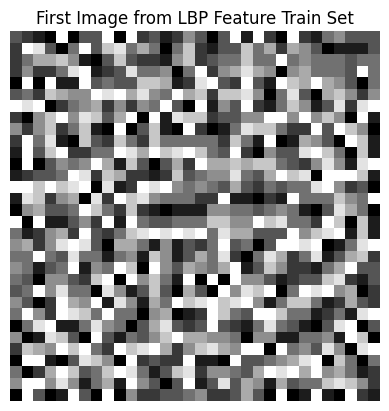

In [10]:
lbp = GenericFeaturesExtractor("lbp")

lbp_features_train = lbp.extract_features(X_train, features_selection=False)
lbp_features_test = lbp.extract_features(X_test, features_selection=False)
# Get the first image from the LBP feature train set
first_image = lbp_features_train[0]

# Plot the image
plt.imshow(first_image, cmap='gray')
plt.axis('off')
plt.title('First Image from LBP Feature Train Set')
plt.show()

## Models selection

We are comparing results from three different classifiers:

- SVC that is non-parametric and non linear.
- Logistic Regression that is parametric and linear.
- KNN that is non parametric and non linear.

In [5]:
accuracy, report = benchmark_models(hog_features_train, y_train, hog_features_test, y_test, model_list=["svc", "logistic_regression", "knn"])

------svc------
Accuracy: 0.582
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       148
           1       0.72      0.68      0.70       170
           2       0.48      0.45      0.46       138
           3       0.40      0.41      0.40       144
           4       0.48      0.56      0.52       151
           5       0.51      0.44      0.48       140
           6       0.62      0.74      0.68       134
           7       0.64      0.57      0.60       146
           8       0.66      0.67      0.67       173
           9       0.67      0.63      0.65       156

    accuracy                           0.58      1500
   macro avg       0.58      0.58      0.58      1500
weighted avg       0.58      0.58      0.58      1500

------logistic_regression------


/home/spottedbush/.virtualenvs/cifar_classif/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5166666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       148
           1       0.62      0.61      0.61       170
           2       0.42      0.40      0.41       138
           3       0.38      0.26      0.31       144
           4       0.48      0.49      0.48       151
           5       0.49      0.38      0.43       140
           6       0.48      0.70      0.57       134
           7       0.45      0.56      0.50       146
           8       0.61      0.59      0.60       173
           9       0.61      0.56      0.58       156

    accuracy                           0.52      1500
   macro avg       0.51      0.51      0.51      1500
weighted avg       0.52      0.52      0.51      1500

------knn------
Accuracy: 0.42733333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.44      0.48       148
           

## CrossValidation

Let's check that we haven't overfit our model with a CrossValidation: (we only checked SVC because it is our best model)

In [5]:
svc = GenericClassifier(kernel="svc")
svc.set_parameters({'C':0.1, 'kernel':'poly'})
scores = cross_val_score(svc.kernel, hog_features_train, y_train, cv=6)  # X and y are your input features and target variable
print("Cross-validation scores:", scores)
mean_score = scores.mean()
print("Mean accuracy:", mean_score)

Cross-validation scores: [0.53024194 0.55745968 0.54435484 0.54233871 0.55297679 0.5469223 ]
Mean accuracy: 0.5457157088527934


Good news, it seems that our results aren't overfitted !
(We lost some accuracy because our train sample got smaller)

## Grid Search

Since SVC seems to be our best model, we are going to do a GridSearch in order to know its optimal hyer-parameters

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],               # Regularisation parameter
    'gamma': [1, 0.1, 0.01, 0.001],       # Kernel coefficient (for rbf, poly et sigmoid)
    'kernel': ['rbf', 'poly', 'sigmoid']  # Type of kernel
}

svc = GenericClassifier(kernel='svc')
svc.set_parameters({'kernel': 'poly'})
grid_search = svc.grid_search(param_grid, hog_features_train, y_train, verbose=True)

print(f"Best parameters: {grid_search.best_params_}, best score: {grid_search.best_score_}")

## Metrics

In [7]:
from CIFAR_Classif.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

svc = GenericClassifier(kernel='svc')
svc.set_parameters({'C':0.1, 'kernel': 'poly'})
svc.fit(hog_features_train, y_train)
y_pred = svc.predict(hog_features_test)
y_true = y_test


Now some metrics on our SVC to understand well our results

Confusion matrix

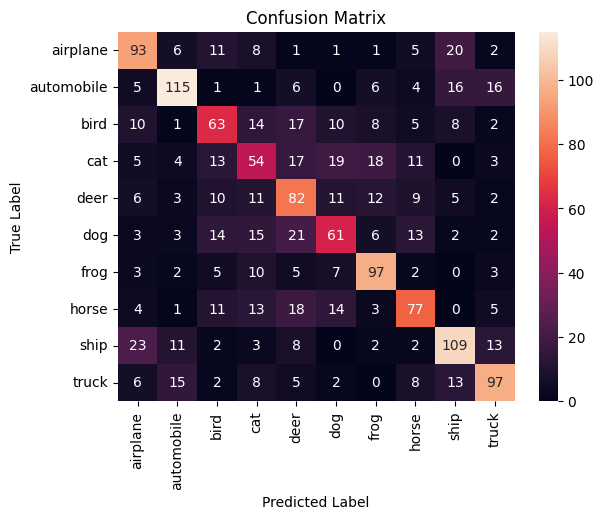

In [8]:
plot_confusion_matrix(y_true, y_pred, labels=labels_meaning)

Precision Recall Curve

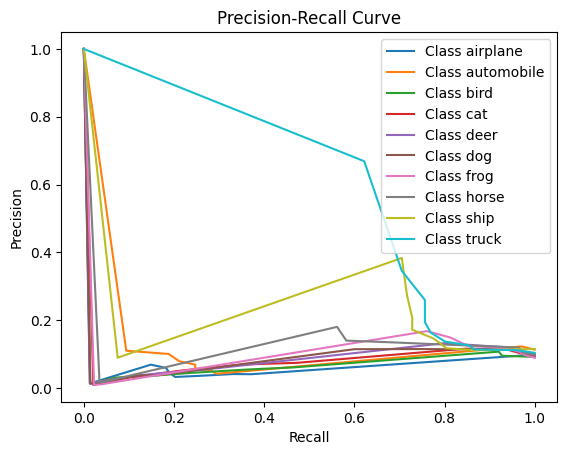

In [9]:
plot_precision_recall_curve(y_true, y_pred, labels=labels_meaning)

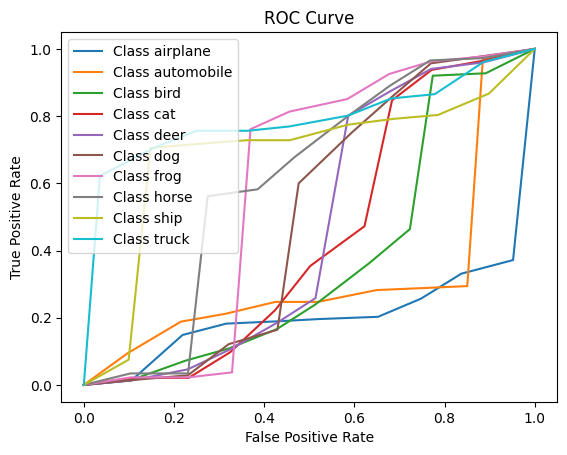

In [10]:
plot_roc_curve(y_true, y_pred, labels=labels_meaning)